<a href="https://colab.research.google.com/github/ShahdHesham10/Project-of-emotion-detection-for-smart-government-services-quality/blob/main/MIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import glob

!rm -rf Positive Negative Twitter twitter_dataset.csv arabic_twitter_dataset.csv

!apt-get install unrar > /dev/null

print("unfolding")
rar_files = glob.glob("*.rar")
if rar_files:
    !unrar x -o+ "{rar_files[0]}" > /dev/null
    print(f" unfolded: {rar_files[0]}")
else:

    !unzip -o *.zip > /dev/null 2>&1
    print(" unfolded successfully (ZIP).")

print(" searching for the tweets")
data = []

for root, dirs, files in os.walk("."):
    for label in ['Positive', 'Negative']:
        if label in os.path.basename(root):
            for filename in files:
                try:
                    file_path = os.path.join(root, filename)
                    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                        text = f.read().strip()
                        if text:
                            data.append({'text': text, 'label': label})
                except: continue
        elif label in dirs:
             target_dir = os.path.join(root, label)
             for filename in os.listdir(target_dir):
                try:
                    file_path = os.path.join(target_dir, filename)
                    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                        text = f.read().strip()
                        if text:
                            data.append({'text': text, 'label': label})
                except: continue

if len(data) > 0:
    df = pd.DataFrame(data)
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    df.to_csv('arabic_twitter_dataset.csv', index=False)
    print(f"success {len(df)} ")
    print(df.head())
else:
    print("failed")

unfolding
 unfolded: Twitter.rar
 searching for the tweets
success 3976 
                            text     label
0           الله ع الكلام الجميل  Positive
1       لانهم يمكن يكونو قاهرينك  Negative
2                ايارب يتقبل منا  Positive
3           يعني هي ما راح تعتزر  Negative
4  الامل بالله كبيييييير انشالله  Positive


In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split


df = pd.read_csv('arabic_twitter_dataset.csv')

def clean_text(text):
    text = str(text)
    text = re.sub(r'[\u064B-\u065F\u0670]', '', text)
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("g", "q", text)
    text = re.sub(r'[^\u0600-\u06ff\u0750-\u077f\ufb50-\ufdff\ufe70-\ufeff\s]', '', text)
    return text.strip()

df['clean_text'] = df['text'].apply(clean_text)

label_map = {'Positive': 1, 'Negative': 0}
df['label_id'] = df['label'].map(label_map)

df.dropna(subset=['clean_text', 'label_id'], inplace=True)
df = df[df['clean_text'].str.len() > 2]

X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label_id'], test_size=0.2, random_state=42, stratify=df['label_id']
)

print(f" Data is ready:\n- Training set size: {len(X_train)}\n- Test set size: {len(X_test)}")

 Data is ready:
- Training set size: 3174
- Test set size: 794



2. Generating Exploratory Data Analysis (EDA) Report...


/tmp/ipython-input-1755723168.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


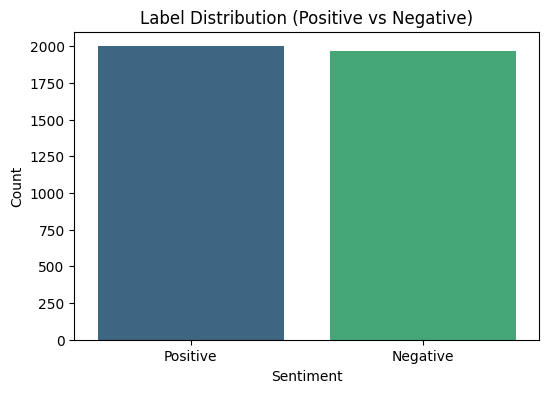

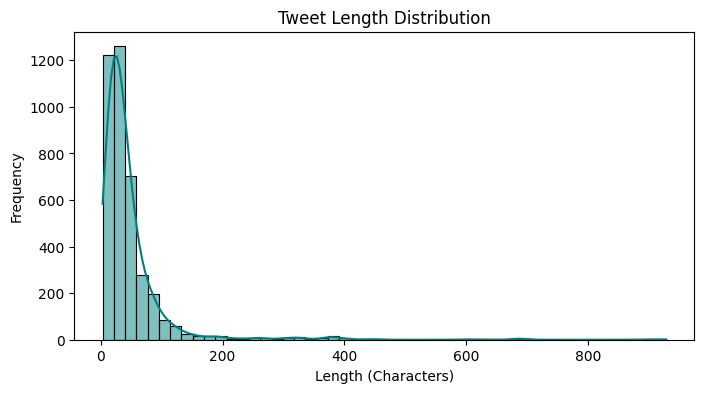

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n2. Generating Exploratory Data Analysis (EDA) Report...")

# Plot Label Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Label Distribution (Positive vs Negative)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Plot Tweet Length Distribution
df['text_len'] = df['clean_text'].apply(len)
plt.figure(figsize=(8, 4))
sns.histplot(df['text_len'], bins=50, color='teal', kde=True)
plt.title('Tweet Length Distribution')
plt.xlabel('Length (Characters)')
plt.ylabel('Frequency')
plt.show()